In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

-75.24642718493925 21.667728953025687
49.65493162656989 -76.70093197807084
4.663422290286519 -176.96058700944735
-1.3650685420353028 91.08975862712083
10.31544482038818 13.372563848459748
18.52697228419997 37.91928390052834
66.33428810642931 -81.22029679321032
-23.391955280560012 -172.2778094158247
61.44373348423943 162.216204507398
-75.88995924206222 8.890298600439195
33.24065217718673 170.30160880205403
-74.73500239336718 165.79346773002487
9.214698490578272 -30.536589797500568
0.15670098167905167 102.06695399547363
60.24704445196201 -143.38763563237296
31.956216821377552 38.45868656585023
42.717643318284445 -30.5158825311255
67.46958551955962 119.06979255684399
86.86493412234728 64.09706647762624
59.11009703222106 164.23907892862024
-4.384754658982132 -57.15710965825134
1.1046561090324047 31.24130887051848
-72.62247159956709 65.70098882465112
41.24445735113912 -109.42779249537918
84.42935427325241 17.999647086727123
87.74019518553405 51.42955961908433
-3.865025707936482 -24.53152960

In [5]:
from citipy import citipy

In [6]:
cities = []

# Identify nearest cities for lats and longs
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name

    # Add each unique city to list
    if city not in cities:
        cities.append(city)

len(cities)

622

In [9]:
import requests
from config import weather_api_key
import time
from datetime import datetime

In [17]:
city_data = []

# initialize URL w/ API key for OpenWeatherMap
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(
    "Beginning Data Retrieval\n",
    "-----------------------------"
)

# create counters
record_count = 1
set_count = 1

# loop through all cities in list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 1
        time.sleep(60) # Only allowed 60 API calls/minute; sleep to prevent time-out errors.

    # Create endpoint URL for each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers for each city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

    try:
        # Parse the JSON and retrieve data.
        weather = requests.get(city_url).json()
        lat = weather["coord"]["lat"]
        lng = weather["coord"]["lon"]
        max_temp = weather["main"]["temp_max"]
        humidity = weather["main"]["humidity"]
        clouds = weather["clouds"]["all"]
        wind = weather["wind"]["speed"]
        country = weather["sys"]["country"]

        # Convert the date to ISO standard.
        date = datetime.utcfromtimestamp(weather["dt"]).strftime('%Y-%m-%d %H:%M:S')

        # Append city info to city_data list.
        city_data.append({"City" : city.title(),
                          "Lat" : lat,
                          "Lng" : lng,
                          "Max Temp" : max_temp,
                          "Humidity" : humidity,
                          "Clouds" : clouds,
                          "Wind" : wind,
                          "Country" : country,
                          "Date" : date})
    except:
        print(f"{city} not found. Skipping...")
        continue

# Indicate that data loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
 -----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | matagami
Processing Record 3 of Set 1 | vaitupu
vaitupu not found. Skipping...
Processing Record 4 of Set 1 | meulaboh
Processing Record 5 of Set 1 | mubi
Processing Record 6 of Set 1 | tawkar
tawkar not found. Skipping...
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | ossora
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | sao filipe
Processing Record 14 of Set 1 | balaipungut
Processing Record 15 of Set 1 | palmer
Processing Record 16 of Set 1 | turayf
Processing Record 17 of Set 1 | lagoa
Processing Record 18 of Set 1 | verkhnevilyuysk
Processing Record 19 of Set 1 | amderma
amderma not found. Skipping...
Processing Record 20 of Set 1 | maues
Processing Record 21 of Set 1 | hoima
Processing Rec

In [18]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind,Country,Date
0,Bredasdorp,-34.5322,20.0403,47.84,88,100,1.92,ZA,2022-07-21 20:49:S
1,Matagami,49.7502,-77.6328,64.51,94,100,10.36,CA,2022-07-21 20:49:S
2,Meulaboh,4.1363,96.1285,77.99,82,100,4.56,ID,2022-07-21 20:49:S
3,Mubi,10.2676,13.2644,73.47,85,90,2.75,NG,2022-07-21 20:49:S
4,Iqaluit,63.7506,-68.5145,42.53,86,100,5.75,CA,2022-07-21 20:49:S
5,Vaini,-21.2000,-175.2000,75.36,83,20,8.05,TO,2022-07-21 20:49:S
6,Ossora,59.2353,163.0719,60.35,60,0,5.21,RU,2022-07-21 20:49:S
7,Hermanus,-34.4187,19.2345,53.62,76,100,1.81,ZA,2022-07-21 20:49:S
8,Nikolskoye,59.7035,30.7861,64.29,83,1,0.85,RU,2022-07-21 20:49:S
9,Bluff,-46.6000,168.3333,37.80,83,85,9.51,NZ,2022-07-21 20:49:S


In [19]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Clouds", "Wind"]]
city_data_df.rename(columns={"Clouds":"Cloudiness", "Wind":"Wind Speed"}, inplace=True)
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2022-07-21 20:49:S,-34.5322,20.0403,47.84,88,100,1.92
1,Matagami,CA,2022-07-21 20:49:S,49.7502,-77.6328,64.51,94,100,10.36
2,Meulaboh,ID,2022-07-21 20:49:S,4.1363,96.1285,77.99,82,100,4.56
3,Mubi,NG,2022-07-21 20:49:S,10.2676,13.2644,73.47,85,90,2.75
4,Iqaluit,CA,2022-07-21 20:49:S,63.7506,-68.5145,42.53,86,100,5.75


In [21]:
city_data_df.to_csv("./Weather-Data/cities.csv", index_label="City_ID")

In [29]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidities = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speeds = city_data_df["Wind Speed"]

In [32]:
import time
# Get today's date
today = time.strftime("%x")

'07/21/22'

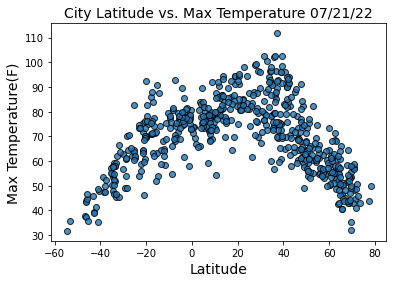

In [34]:
plt.scatter(lats, max_temps,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label=cities)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature(F)', fontsize=14)
plt.title('City Latitude vs. Max Temperature ' + today, fontsize=14)

plt.show()

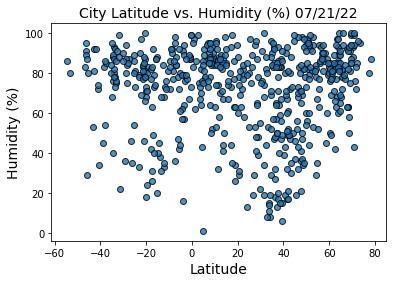

In [40]:
plt.scatter(lats, humidities,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label=cities)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.title('City Latitude vs. Humidity (%) ' + today, fontsize=14)

plt.show()

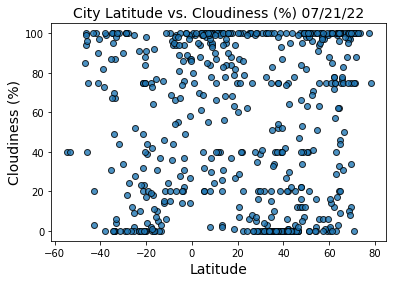

In [39]:
plt.scatter(lats, cloudiness,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label=cities)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.title('City Latitude vs. Cloudiness (%) ' + today, fontsize=14)

plt.show()

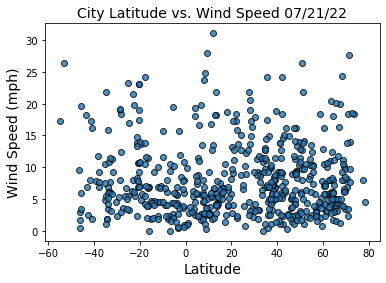

In [41]:
plt.scatter(lats, wind_speeds,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label=cities)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.title('City Latitude vs. Wind Speed ' + today, fontsize=14)

plt.show()